In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sn 

from torchvision import datasets
from itertools import combinations
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis



In [3]:
# A) Do an SVD analysis of the digit images. You will need to reshape each image into a column vector,
# and each column of your data matrix is a different image

dataset = datasets.MNIST(root="dataset/", download=True)
labels = dataset.targets.numpy()
dataset = dataset.data.numpy().reshape(-1,784).T

U, S, VT = np.linalg.svd(dataset, full_matrices=False)




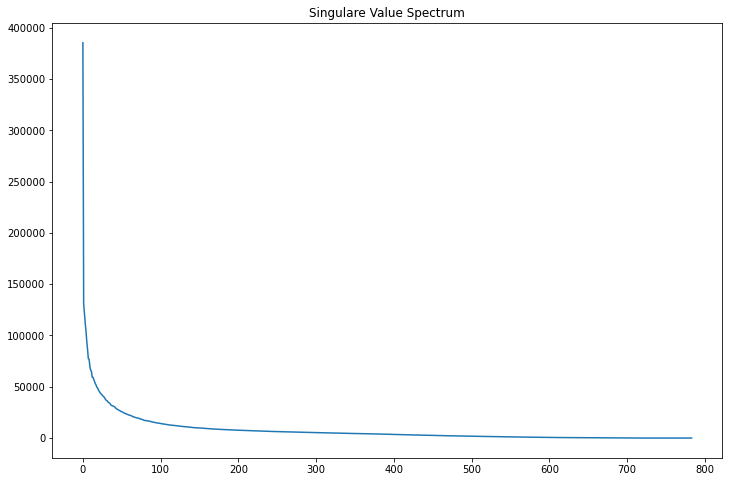

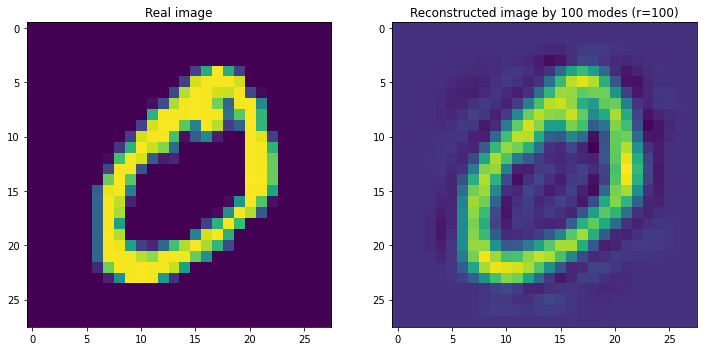

In [4]:
# B) What does the singular value spectru look like, and how many modes are necessary for a good reconstruction?
# (that is, what is the rank r of the digit space?)
plt.figure(figsize=(12,8))
plt.plot(S)
plt.title('Singulare Value Spectrum')
#looking at the Singular Value Spectrum plot, it looks like at least 100 modes are necessary for a good reconstruction


f, ax = plt.subplots(1,2,figsize=(12,8))
ax[0].imshow(dataset[:,1].reshape(28,28))
ax[0].set_title('Real image')
ax[1].imshow((U[:,:100]@np.diag(S)[:100,:]@VT[:,:100])[:,1].reshape(28,28))
ax[1].set_title('Reconstructed image by 100 modes (r=100)');

In [5]:
# C) What is the interpretation of the U, Sigma, and V matrices?


print('U contains the modes (i.e. patterns), V contains the loading scores for the modes (i.e. wieghts), \
S contains singular values')

U contains the modes (i.e. patterns), V contains the loading scores for the modes (i.e. wieghts), S contains singular values


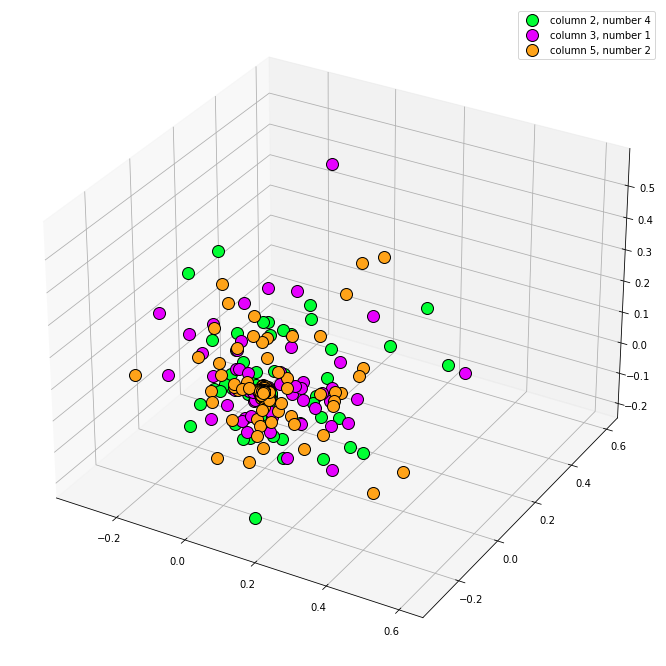

In [6]:
# D) on a 3D plot, project onto three selected V modes (columns) colorated by their digit label, for example, columns 2,3, and 5

plt.rcParams['figure.figsize'] = [12, 12]
fig = plt.figure()
ax = plt.subplot(111,projection='3d')
#column 2 
ax.plot(VT[:,2],VT[:,3],VT[:,5],'o', markerfacecolor=(0,1,0.2),markeredgecolor='k', ms=12, label='column 2, number 4')
#column 3
ax.plot(VT[:,3],VT[:,2],VT[:,5], 'o', markerfacecolor=(0.9,0,1),markeredgecolor='k', ms=12, label='column 3, number 1')
#column 5
ax.plot(VT[:,5],VT[:,3],VT[:,2],'o', markerfacecolor=(1,0.64,0.098),markeredgecolor='k', ms=12, label='column 5, number 2')
ax.legend()
plt.show()


In [7]:
# E) Pick two digits. See if you can build a linear classifier (LDA) that can reasonably identify them

Two_Digits_Label = (labels==1) + (labels==3)

Two_digits, Two_digits_label = dataset[:, Two_Digits_Label], labels[Two_Digits_Label]

X_train, X_test, Y_train, Y_test = train_test_split(Two_digits.T, Two_digits_label, test_size=0.3, shuffle=True)

lda = LinearDiscriminantAnalysis()
LDA = lda.fit(X_train, Y_train)
test_labels = LDA.predict(X_test)

acc_LDA = accuracy_score(Y_test,test_labels)
print("Accuracy", acc_LDA)

Accuracy 0.983946141895391


In [8]:
# F) Pick three digits. Try to build a LDA to clasify these 3 now.

Three_Digits_Label = (labels==1) + (labels==3) + (labels==4)
Three_digits, Three_digits_label = dataset[:, Three_Digits_Label], labels[Three_Digits_Label]


X_train_1, X_test_1, Y_train_1, Y_test_1 = train_test_split(Three_digits.T, Three_digits_label, test_size=0.3, shuffle=True)

LDA_1 = lda.fit(X_train_1, Y_train_1)
test_labels_1 = LDA_1.predict(X_test_1)

acc_LDA_1 = accuracy_score(Y_test_1,test_labels_1) 

print("Accuracy", acc_LDA_1)

Accuracy 0.9766696349065005


Accuracy 0.8661666666666666
Looking at the confusion matrix, the two digits that are most difficult to separate are 7 and 9


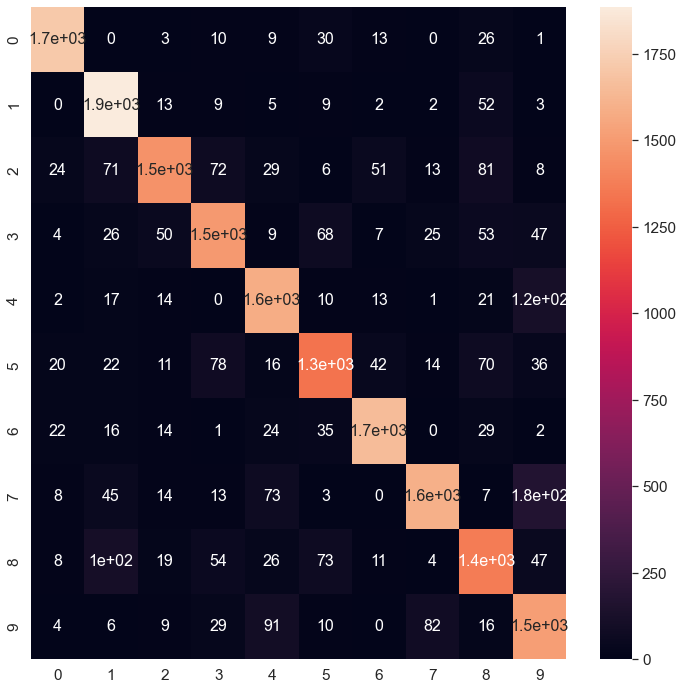

In [9]:
# G) Which two digits in the data set appear to be the most difficult to separate? Quantify the accuracy
# of the separation with LDA on the test data

X_train_t, X_test_t, Y_train_t, Y_test_t = train_test_split(dataset.T, labels, test_size=0.3, shuffle=True)

LDA_t = lda.fit(X_train_t, Y_train_t)
test_labels_t = LDA_t.predict(X_test_t)


acc_LDA_t= accuracy_score(Y_test_t,test_labels_t) 
print("Accuracy", acc_LDA_t)

mat = confusion_matrix(Y_test_t, test_labels_t)
df_cm = pd.DataFrame(mat, range(10), range(10) )

sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16})
                     
print("Looking at the confusion matrix, the two digits that are most difficult to separate are 7 and 9")             

In [10]:
# H) Which two digits in the data set are most easy to separate? Quantify the accuracy
# of the separation with LDA on the test data

print("Looking at the confusion matrix, the two digits that are most easy to separate are 0 and 1") 

Looking at the confusion matrix, the two digits that are most easy to separate are 0 and 1


In [12]:
# I) SVM and DecisionTreeClassifier were the state of the art until about 2014.
# How well do these separate between all 10 digits?

SVM = SVC(probability=True)
DT = DecisionTreeClassifier()

SVM_t = SVM.fit(X_train_t, Y_train_t)
DT_t = DT.fit(X_train_t, Y_train_t)

test_labels_SVM_t = SVM_t.predict(X_test_t)
test_labels_DT_t = DT_t.predict(X_test_t)

acc_SVM_t= accuracy_score(Y_test_t,test_labels_SVM_t) 
acc_DT_t= accuracy_score(Y_test_t,test_labels_DT_t) 

print("Accuracy of LDA to separate btw all digits", acc_LDA_t)
print("Accuracy of SVM to separate  btw all digits", acc_SVM_t)
print("Accuracy of Decision Tree to separate  btw all digits", acc_DT_t)


Accuracy of LDA to separate btw all digits 0.8661666666666666
Accuracy of SVM to separate  btw all digits 0.9752222222222222
Accuracy of Decision Tree to separate  btw all digits 0.8685


Accuracy of LDA to separate 0 and 1 0.9905263157894737
Accuracy of SVM to separate 0 and 1 0.9986842105263158
Accuracy of Decision Tree to separate 0 and 1 0.9952631578947368
Accuracy of LDA to separate 7 and 9 0.9457025920873124
Accuracy of SVM to separate 7 and 9 0.9874488403819918
Accuracy of Decision Tree to separate 7 and 9 0.9664392905866303


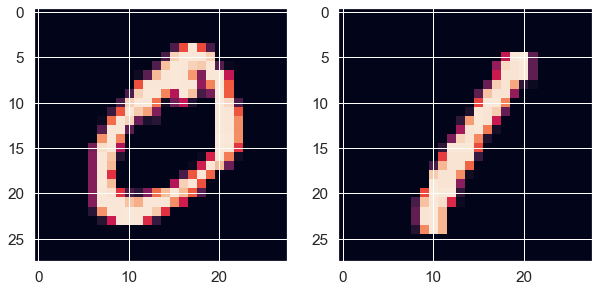

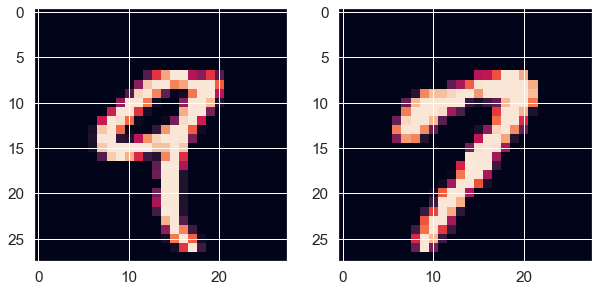

In [15]:
# J) Compare the performance between LDA, SVM, and Decision Trees on the hardest and easiest pair of digits to separate

#Identify 0 and 1 
Easy_Digits_Label = (labels==0) + (labels==1)

Easy_digits, Easy_digits_label = dataset[:, Easy_Digits_Label], labels[Easy_Digits_Label]
f, ax = plt.subplots(1, 2, figsize=(10,10))
for i in range(2):
    ax[i].imshow(Easy_digits[:,i].reshape(28,28))

    
X_train_e, X_test_e, Y_train_e, Y_test_e = train_test_split(Easy_digits.T, Easy_digits_label, test_size=0.3, shuffle=True)

LDA_e = LDA.fit(X_train_e, Y_train_e)
SVM_e = SVM.fit(X_train_e, Y_train_e)
DT_e = DT.fit(X_train_e, Y_train_e)

test_labels_LDA_e = LDA_e.predict(X_test_e)
test_labels_SVM_e = SVM_e.predict(X_test_e)
test_labels_DT_e = DT_e.predict(X_test_e)


acc_LDA_e= accuracy_score(Y_test_e,test_labels_LDA_e) 
acc_SVM_e= accuracy_score(Y_test_e,test_labels_SVM_e) 
acc_DT_e= accuracy_score(Y_test_e,test_labels_DT_e) 

print("Accuracy of LDA to separate 0 and 1", acc_LDA_e)
print("Accuracy of SVM to separate 0 and 1", acc_SVM_e)
print("Accuracy of Decision Tree to separate 0 and 1", acc_DT_e)


#Identify 7 and 9 
Hard_Digits_Label = (labels==7) + (labels==9)

Hard_digits, Hard_digits_label = dataset[:, Hard_Digits_Label], labels[Hard_Digits_Label]
f, ax = plt.subplots(1, 2, figsize=(10,10))
for i in range(2):
    ax[i].imshow(Hard_digits[:,i].reshape(28,28))

    
X_train_h, X_test_h, Y_train_h, Y_test_h = train_test_split(Hard_digits.T, Hard_digits_label, test_size=0.3, shuffle=True)

LDA_h = LDA.fit(X_train_h, Y_train_h)
SVM_h = SVM.fit(X_train_h, Y_train_h)
DT_h = DT.fit(X_train_h, Y_train_h)

test_labels_LDA_h = LDA_h.predict(X_test_h)
test_labels_SVM_h = SVM_h.predict(X_test_h)
test_labels_DT_h = DT_h.predict(X_test_h)


acc_LDA_h = accuracy_score(Y_test_h,test_labels_LDA_h) 
acc_SVM_h = accuracy_score(Y_test_h,test_labels_SVM_h) 
acc_DT_h = accuracy_score(Y_test_h,test_labels_DT_h) 

print("Accuracy of LDA to separate 7 and 9", acc_LDA_h)
print("Accuracy of SVM to separate 7 and 9", acc_SVM_h)
print("Accuracy of Decision Tree to separate 7 and 9", acc_DT_h)
